In [1]:
%matplotlib inline

import pickle
from core import *

read_stats =  pickle.load( open( "pickles/main_20_100.pckl", "rb" ) )

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
for sample in analysis_set["rodan"]:
    name2qscores, name2lengths = get_summaries(summary_files[sample])
    read_stats[sample]= get_sample_stats(sample, refs[sample], name2qscores, name2lengths)

    print(sample, np.median(read_stats[sample]["acc"]), np.median(read_stats[sample]["metrics"], axis = 0))

Processing sample eligos/HS_H460/h460_rodan.sam
The number of supplementary alignments in this sample is  1179688
The number of sequences in this sample is  1648051


100%|███████████████████████████████████████████████████████████████████████████| 1648051/1648051 [02:15<00:00, 12206.35it/s]


Human_rodan 0.9230271668822768 [0.01878736 0.02146597 0.0352    ]
Processing sample eligos/human_ivt/human_ivt_rodan.sam
The number of supplementary alignments in this sample is  1105706
The number of sequences in this sample is  1729393


100%|███████████████████████████████████████████████████████████████████████████| 1729393/1729393 [01:35<00:00, 18135.74it/s]


Human_IVT_rodan 0.9130434782608695 [0.0228013  0.02710027 0.03676471]
Processing sample mouse/mouse_rodan.sam
The number of supplementary alignments in this sample is  49899
The number of sequences in this sample is  85286


100%|███████████████████████████████████████████████████████████████████████████████| 85286/85286 [00:06<00:00, 12920.22it/s]


Mouse_rodan 0.9029850746268657 [0.01822917 0.01502504 0.05917667]
Processing sample nano3pseq/zebrafish_rodan.sam
The number of supplementary alignments in this sample is  59692
The number of sequences in this sample is  155285


100%|██████████████████████████████████████████████████████████████████████████████| 155285/155285 [00:18<00:00, 8473.50it/s]


Zebrafish_rodan 0.8181818181818182 [0.05067568 0.0184244  0.11392405]
Processing sample celegans/celegans_rodan.sam
The number of supplementary alignments in this sample is  122011
The number of sequences in this sample is  222931


100%|█████████████████████████████████████████████████████████████████████████████| 222931/222931 [00:14<00:00, 15695.90it/s]


C. elegans_rodan 0.9408450704225352 [0.01214575 0.01443299 0.03092784]
Processing sample parkersimpson2020/arabidopsis_rodan.sam
The number of supplementary alignments in this sample is  364379
The number of sequences in this sample is  1097675


100%|███████████████████████████████████████████████████████████████████████████| 1097675/1097675 [01:17<00:00, 14122.82it/s]


Arabidopsis_rodan 0.9028871391076115 [0.03209877 0.02777778 0.03325942]
Processing sample regensburg/hvo/hvo_rodan.sam
The number of supplementary alignments in this sample is  82867
The number of sequences in this sample is  14258


100%|███████████████████████████████████████████████████████████████████████████████| 14258/14258 [00:01<00:00, 12794.33it/s]


H. volcanii_rodan 0.9163265306122449 [0.02755102 0.03469388 0.02142857]
Processing sample regensburg/ecoli/ecoli_rodan.sam
The number of supplementary alignments in this sample is  233167
The number of sequences in this sample is  506596


100%|█████████████████████████████████████████████████████████████████████████████| 506596/506596 [00:30<00:00, 16551.73it/s]


E. coli_rodan 0.9206798866855525 [0.02532427 0.02272727 0.02609803]
Processing sample nanorms/small_rna_rodan.sam
The number of supplementary alignments in this sample is  7903
The number of sequences in this sample is  41329


100%|███████████████████████████████████████████████████████████████████████████████| 41329/41329 [00:01<00:00, 24661.49it/s]


shortRNAs_IVT_rodan 0.918918918918919 [0.02027027 0.02643172 0.02684564]
Processing sample epinano/epinano_yeast_rep2/yeast_rodan.sam
The number of supplementary alignments in this sample is  128024
The number of sequences in this sample is  372364


100%|█████████████████████████████████████████████████████████████████████████████| 372364/372364 [00:22<00:00, 16756.05it/s]


Yeast_rodan 0.89171974522293 [0.02816901 0.0255102  0.06013363]
Processing sample sars2/sars2_rodan.sam
The number of supplementary alignments in this sample is  684884
The number of sequences in this sample is  858189


100%|██████████████████████████████████████████████████████████████████████████████| 858189/858189 [01:43<00:00, 8267.79it/s]


SARS2_rodan 0.9156065777226187 [0.01896448 0.01707942 0.04117369]
Processing sample sars2/sars2ivt/sars2ivt_rodan_full.sam
The number of supplementary alignments in this sample is  802199
The number of sequences in this sample is  2452303


100%|███████████████████████████████████████████████████████████████████████████| 2452303/2452303 [03:55<00:00, 10433.30it/s]


SARS2_IVT_rodan 0.92 [0.01825843 0.02092457 0.03336113]


In [3]:
pickle.dump(read_stats, open("pickles/rodan_20_100.pckl", "wb" ) )

In [4]:
# guppy alone
for sample in analysis_set["main"] + analysis_set["rodan"]:
    acc = np.median(read_stats[sample]["acc"])
    n_reads = read_stats[sample]["metrics"].shape[0]
    mis, ins, delete = np.median(read_stats[sample]["metrics"], axis = 0)
    qscore = np.median(read_stats[sample]["qscores"][:, 0])
    length = np.median(read_stats[sample]["aligned_read_length"])
    print("%s & %d & %.1f & %d & %.3f & %.3f & %.3f & %.3f & \\\\ [3ex] \\hline" % (sample, n_reads, qscore, length, acc, mis, ins, delete))

Human & 1483755 & 10.2 & 876 & 0.901 & 0.027 & 0.026 & 0.045 & \\ [3ex] \hline
Human_IVT & 2015950 & 10.7 & 486 & 0.916 & 0.022 & 0.022 & 0.039 & \\ [3ex] \hline
Mouse & 181977 & 9.6 & 616 & 0.878 & 0.036 & 0.025 & 0.059 & \\ [3ex] \hline
Zebrafish & 553604 & 9.6 & 839 & 0.867 & 0.037 & 0.020 & 0.073 & \\ [3ex] \hline
C. elegans & 227372 & 11.0 & 688 & 0.915 & 0.020 & 0.019 & 0.044 & \\ [3ex] \hline
Arabidopsis & 1010943 & 10.7 & 878 & 0.911 & 0.022 & 0.021 & 0.045 & \\ [3ex] \hline
H. volcanii & 22315 & 9.9 & 505 & 0.905 & 0.028 & 0.022 & 0.043 & \\ [3ex] \hline
E. coli & 198448 & 9.3 & 662 & 0.876 & 0.040 & 0.032 & 0.049 & \\ [3ex] \hline
shortRNAs_IVT & 45028 & 8.5 & 160 & 0.899 & 0.026 & 0.019 & 0.051 & \\ [3ex] \hline
Yeast & 324889 & 9.4 & 314 & 0.898 & 0.024 & 0.024 & 0.050 & \\ [3ex] \hline
SARS2 & 575673 & 11.0 & 2078 & 0.914 & 0.022 & 0.020 & 0.044 & \\ [3ex] \hline
SARS2_IVT & 2316635 & 10.5 & 1572 & 0.908 & 0.024 & 0.023 & 0.044 & \\ [3ex] \hline
Human_rodan & 1648051 & 0.0

In [5]:
# rodan comparison
latex = lambda i: ("\\texttt{+}" if float(i) > 0 else "") + str(i)
for sample in analysis_set["rodan"]:
    guppy_sample = sample.split("_rodan")[0]
    n_reads = read_stats[sample]["metrics"].shape[0]
    n_reads_diff = n_reads - read_stats[guppy_sample]["metrics"].shape[0]
    
    acc = np.median(read_stats[sample]["acc"])
    acc_diff = acc - np.median(read_stats[guppy_sample]["acc"])
    acc_diff = str(np.round(acc_diff, 3))

    mis, ins, delete = np.median(read_stats[sample]["metrics"], axis = 0)
    mis_diff, ins_diff, delete_diff = np.median(read_stats[sample]["metrics"], axis = 0) - np.median(read_stats[guppy_sample]["metrics"], axis = 0)
    mis_diff, ins_diff, delete_diff = str(np.round(mis_diff, 3)), str(np.round(ins_diff, 3)), str(np.round(delete_diff, 3))
    # qscore = np.median(read_stats[sample]["qscores"][:, 0])
    length = np.median(read_stats[sample]["aligned_read_length"])
    length_diff = int(length - np.median(read_stats[guppy_sample]["aligned_read_length"]))
    train_flag = "\\textbf{yes}" if guppy_sample in rodan_trainingset else "no"
    
    print("%s & %s & %d (%s) & %d (%s) & %.3f (%s) & %.3f (%s) & %.3f (%s) & %.3f (%s) & \\\\ [3ex] \\hline" 
          % (guppy_sample.replace("_IVT", " (IVT)"), train_flag, n_reads, latex(n_reads_diff), length, latex(length_diff), acc, latex(acc_diff), mis, latex(mis_diff), ins, latex(ins_diff), delete, latex(delete_diff)))

Human & \textbf{yes} & 1648051 (\texttt{+}164296) & 725 (-151) & 0.923 (\texttt{+}0.022) & 0.019 (-0.008) & 0.021 (-0.004) & 0.035 (-0.009) & \\ [3ex] \hline
Human (IVT) & no & 1729393 (-286557) & 375 (-111) & 0.913 (-0.003) & 0.023 (\texttt{+}0.001) & 0.027 (\texttt{+}0.005) & 0.037 (-0.002) & \\ [3ex] \hline
Mouse & no & 85286 (-96691) & 591 (-25) & 0.903 (\texttt{+}0.025) & 0.018 (-0.017) & 0.015 (-0.01) & 0.059 (-0.0) & \\ [3ex] \hline
Zebrafish & no & 155285 (-398319) & 659 (-180) & 0.818 (-0.048) & 0.051 (\texttt{+}0.014) & 0.018 (-0.002) & 0.114 (\texttt{+}0.041) & \\ [3ex] \hline
C. elegans & \textbf{yes} & 222931 (-4441) & 558 (-130) & 0.941 (\texttt{+}0.026) & 0.012 (-0.008) & 0.014 (-0.005) & 0.031 (-0.013) & \\ [3ex] \hline
Arabidopsis & \textbf{yes} & 1097675 (\texttt{+}86732) & 471 (-407) & 0.903 (-0.008) & 0.032 (\texttt{+}0.011) & 0.028 (\texttt{+}0.007) & 0.033 (-0.012) & \\ [3ex] \hline
H. volcanii & no & 14258 (-8057) & 959 (\texttt{+}454) & 0.916 (\texttt{+}0.011) &

In [6]:
def error_bylength(rna, l, step):
    aligned_lens = read_stats[rna]["aligned_read_length"]
    indexes = np.where((aligned_lens >= l) & (aligned_lens < l + step))
    if indexes[0].shape[0] > 10:
        errors = np.sum(read_stats[rna]["metrics"][indexes[0], :], axis = 1)
        return np.median(errors)
    else:
        return None

rodan_trainingset = set(["Human", "E. coli", "Arabidopsis", "C. elegans"])

x, y, hue, train = [], [], [], []
step = 100
llen, hlen = 100, 1500
for sample in analysis_set["main"]:
    rodan_sample = sample + "_rodan"
    for l in range(llen, hlen, step):
        errors_guppy = error_bylength(sample, l, step)
        errors_rodan = error_bylength(rodan_sample, l, step)
        if errors_guppy is not None and errors_rodan is not None:
            x.append(l)
            y.append(errors_guppy - errors_rodan)
            hue.append(sample.replace("_IVT", " (IVT)"))
            if sample in rodan_trainingset:
                train.append("Yes")
            else:
                train.append("No")

for sample in analysis_set["main"]:
    rodan_sample = sample + "_rodan"
    errors_guppy = error_bylength(sample, hlen, 100000)
    errors_rodan = error_bylength(rodan_sample, hlen, 100000)
    if errors_guppy is not None and errors_rodan is not None:
        x.append(hlen)
        y.append(errors_guppy - errors_rodan)
        hue.append(sample.replace("_IVT", " (IVT)"))
        if sample in rodan_trainingset:
            train.append("Yes")
        else:
            train.append("No")

print(len(x), len(y), len(hue), len(train))

import pandas as pd
data = pd.DataFrame([x, y, hue, train], index=["x", "y", "Species", "In training data"]).T

169 169 169 169


In [7]:
colors = list(sns.color_palette(palette=None, n_colors=10, desat=None, as_cmap=False))
colors.append( (1.0, 0.8509803921568627, 0.1843137254901961))
colors.append((0.6509803921568628, 0.8470588235294118, 0.32941176470588235))
sns.color_palette(palette=colors)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)]

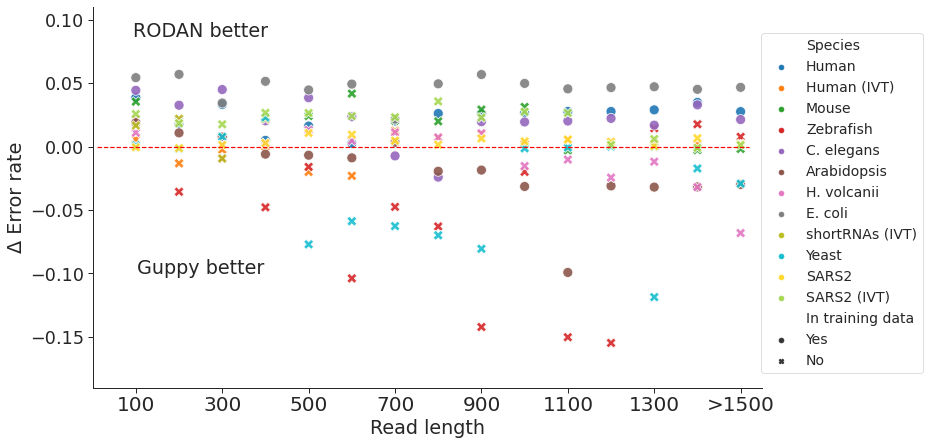

In [13]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize': (12, 7)})   
sns.set_context("paper", font_scale = 2)
sns.set_style("ticks")

sns.scatterplot(data = data, x = "x", y = "y", hue = "Species", palette=colors, 
                s = 100, style="In training data", alpha = 0.9)
sns.lineplot(x = [10, hlen+20], y = [0, 0], color = "red", linestyle = "--")
sns.despine()
fig.text(0.25, 0.82,  "RODAN better", ha = "center")
fig.text(0.25, 0.35,  "Guppy better", ha = "center")
plt.legend(fontsize = 14, loc = 'upper right', bbox_to_anchor = (1.25, 0.95), fancybox = True, ncol = 1)
plt.xlabel("Read length"), plt.ylabel(u'Δ Error rate')
plt.ylim(-0.19, 0.11)
plt.xlim(0, 1550)

plt.xticks([100, 300, 500, 700, 900, 1100, 1300, 1500], fontsize = 20)
labels = [100, 300, 500, 700, 900, 1100, 1300, ">1500"]
ax.set_xticklabels(labels)
plt.savefig("images/rodan/rodan_byLength", bbox_inches = "tight")
plt.show()

In [10]:
for sample in analysis_set['main'] + analysis_set["rodan"]:
    index = np.where(np.sum(read_stats[sample]["metrics"], axis =1) > 0.3)
    read_stats[sample]["metrics_filtered"] = np.delete(read_stats[sample]["metrics"], index, axis = 0)
    # read_stats[sample]["qscores_filtered"] = np.delete(read_stats[sample]["qscores"], index, axis = 0)
    print(sample, read_stats[sample]["metrics_filtered"].shape, read_stats[sample]["metrics"].shape)
    print(np.where(np.sum(read_stats[sample]["metrics_filtered"], axis =1) > 0.3))

Human (1477796, 3) (1483755, 3)
(array([], dtype=int64),)
Human_IVT (2013859, 3) (2015950, 3)
(array([], dtype=int64),)
Mouse (181659, 3) (181977, 3)
(array([], dtype=int64),)
Zebrafish (551674, 3) (553604, 3)
(array([], dtype=int64),)
C. elegans (226700, 3) (227372, 3)
(array([], dtype=int64),)
Arabidopsis (1007568, 3) (1010943, 3)
(array([], dtype=int64),)
H. volcanii (22298, 3) (22315, 3)
(array([], dtype=int64),)
E. coli (198008, 3) (198448, 3)
(array([], dtype=int64),)
shortRNAs_IVT (44998, 3) (45028, 3)
(array([], dtype=int64),)
Yeast (323972, 3) (324889, 3)
(array([], dtype=int64),)
SARS2 (573635, 3) (575673, 3)
(array([], dtype=int64),)
SARS2_IVT (2301945, 3) (2316635, 3)
(array([], dtype=int64),)
Human_rodan (1645674, 3) (1648051, 3)
(array([], dtype=int64),)
Human_IVT_rodan (1721881, 3) (1729393, 3)
(array([], dtype=int64),)
Mouse_rodan (85158, 3) (85286, 3)
(array([], dtype=int64),)
Zebrafish_rodan (154413, 3) (155285, 3)
(array([], dtype=int64),)
C. elegans_rodan (222627, 3

Human 1477796
Human_rodan 1645674


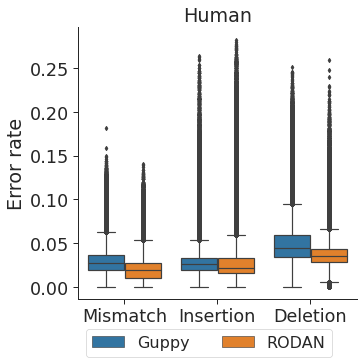

Human_IVT 2013859
Human_IVT_rodan 1721881


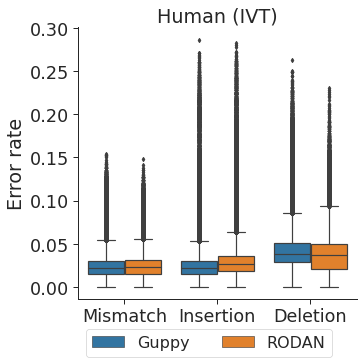

Mouse 181659
Mouse_rodan 85158


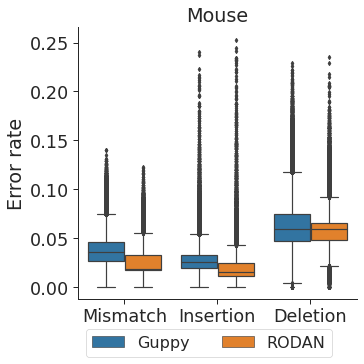

Zebrafish 551674
Zebrafish_rodan 154413


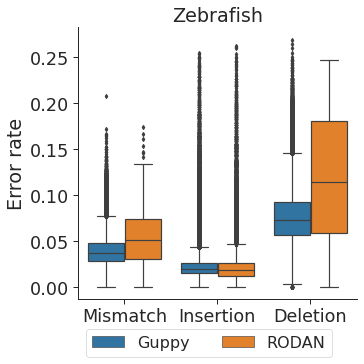

C. elegans 226700
C. elegans_rodan 222627


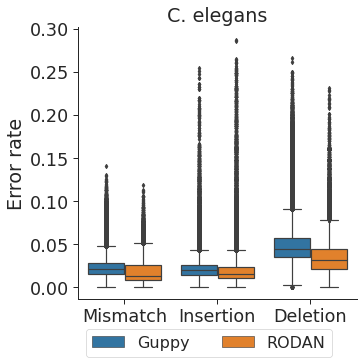

Arabidopsis 1007568
Arabidopsis_rodan 1096777


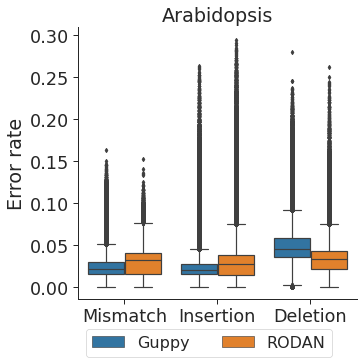

H. volcanii 22298
H. volcanii_rodan 14007


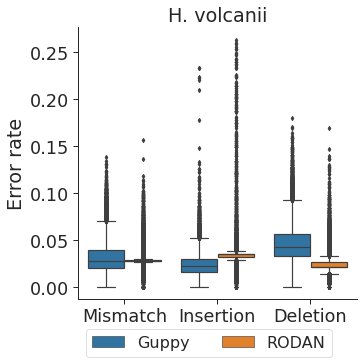

E. coli 198008
E. coli_rodan 502399


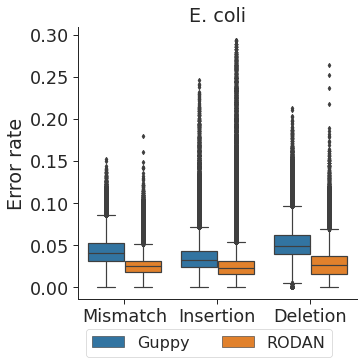

shortRNAs_IVT 44998
shortRNAs_IVT_rodan 41313


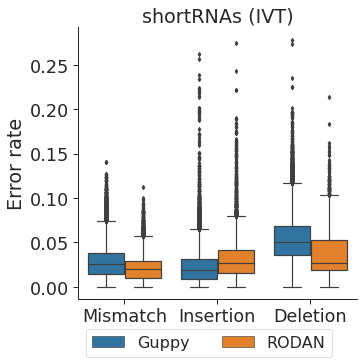

Yeast 323972
Yeast_rodan 370628


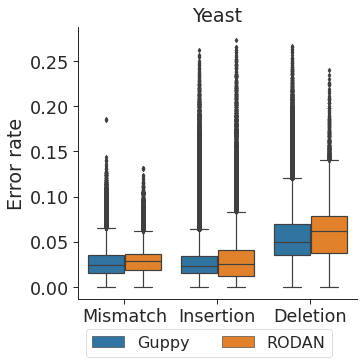

SARS2 573635
SARS2_rodan 849544


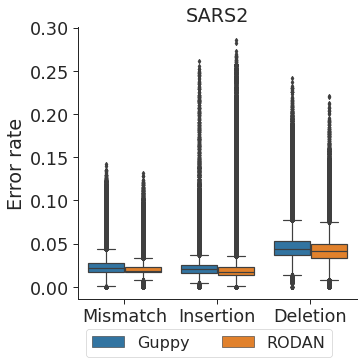

SARS2_IVT 2301945
SARS2_IVT_rodan 2319849


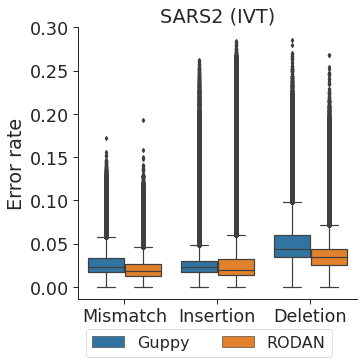

In [11]:
sns.set(rc = {'figure.figsize': (5, 5)})   
sns.set_context("paper", font_scale = 2)
sns.set_style("ticks")
    
for species in analysis_set["main"]:
    x, y, hue = [], [], []
    metric_label = ["Mismatch", "Insertion", "Deletion"]

    for sample in [species, species+"_rodan"]:
        print(sample, read_stats[sample]["metrics_filtered"].shape[0])
        dim = read_stats[sample]["metrics_filtered"].shape[0]*3
        x1, y1 = np.empty(dim, dtype = "<U32"), np.empty(dim, dtype = np.float64)
        hue1 = np.empty(dim, dtype = "U15")
        l, step = 0, read_stats[sample]["metrics_filtered"].shape[0]
        for col in range(3):
            x1[l : (col+1) * step] = metric_label[col]
            l = (col+1) * step
        y1 = read_stats[sample]["metrics_filtered"].flatten(order="F")
        hue1[:] = "Guppy" if "_rodan" not in sample else "RODAN"

        x = np.concatenate([x, x1])
        hue = np.concatenate([hue, hue1])
        y = np.concatenate([y, y1])

    sns.boxplot(x = x, y = y, hue = hue, palette = colors, fliersize = 3)
    sns.despine()
    plt.legend(fontsize = 16, loc = 'upper center', bbox_to_anchor = (0.47, -0.08), fancybox = True, ncol = 6)
    # plt.ylim((-0.02, 0.32))
    title = species if "IVT" not in species else species.split("_IVT")[0] + " (IVT)"
    plt.title(title)
    plt.ylabel("Error rate")
    plt.savefig("images/rodan/rodan_" + species.replace(". ", ""), bbox_inches = "tight")
    plt.show()

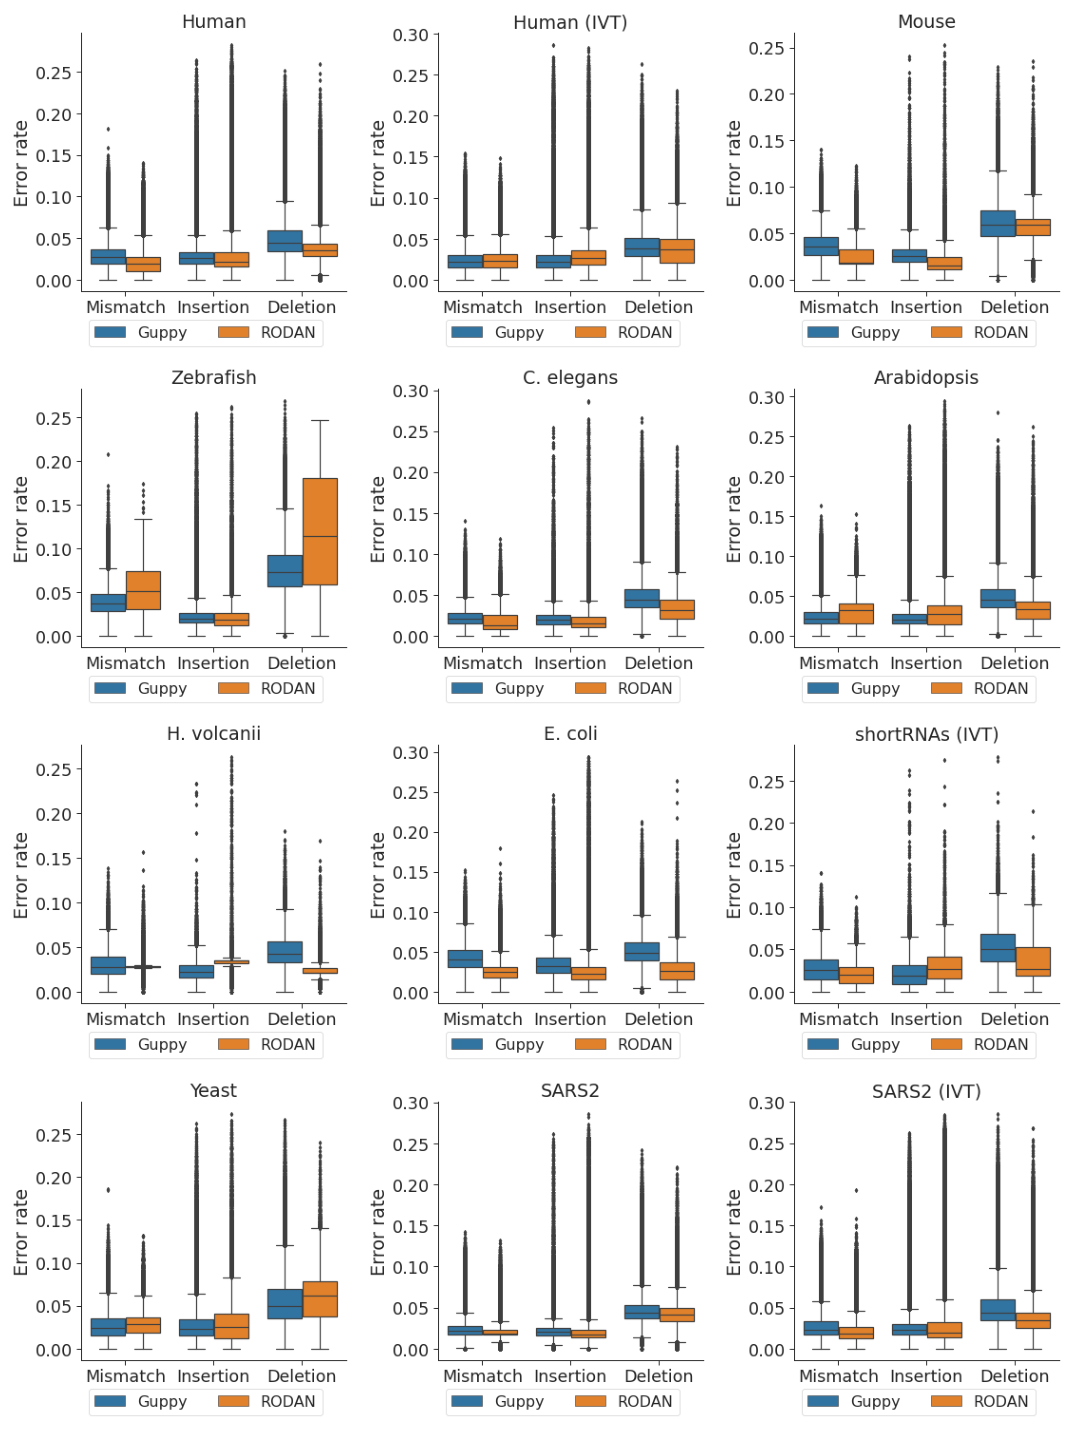

In [14]:
%matplotlib inline
from core import *
import matplotlib.image as mpimg

samples = analysis_set["main"]

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes[-1, -1].axis("off")
axes[-1, -2].axis("off")
row, col = 0, 0
for sample in samples:
    img = mpimg.imread("images/rodan/rodan_" + str(sample).replace(". ", "") + ".png")
    axes[row, col].imshow(img)
    axes[row, col].axis("off")
    fig.tight_layout()
    
    col += 1
    if col == 3:
        row += 1
        col = 0
fig.tight_layout()
plt.savefig("images/rodan/rodan_all", bbox_inches = "tight")
plt.show()

Human
(400000,) (400000,) (400000,)


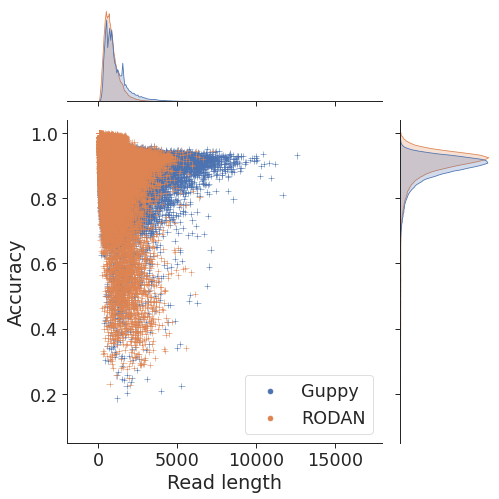

Human_IVT
(400000,) (400000,) (400000,)


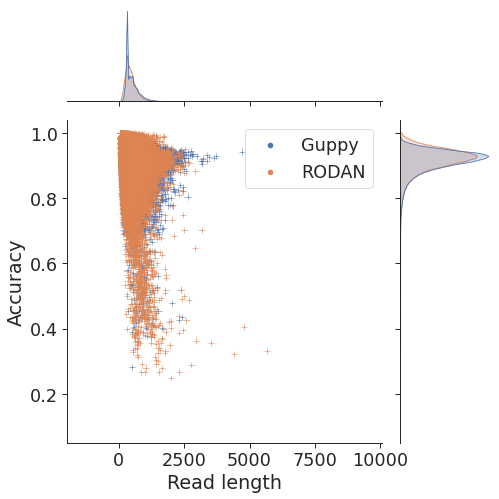

Mouse
(267263,) (267263,) (267263,)


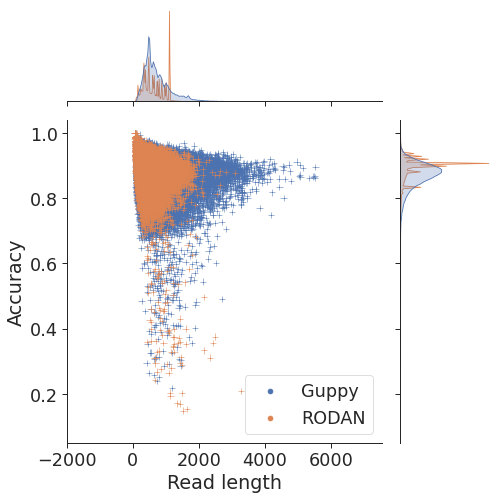

Zebrafish
(355285,) (355285,) (355285,)


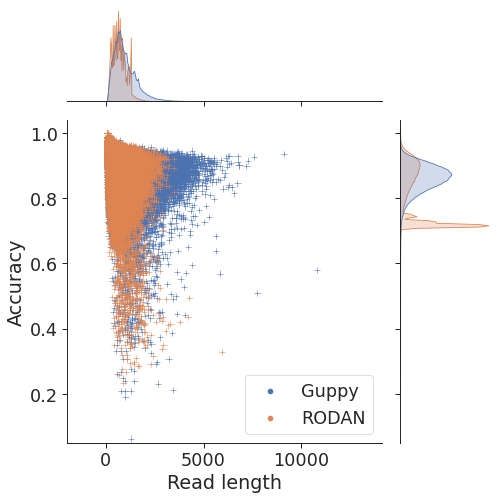

C. elegans
(400000,) (400000,) (400000,)


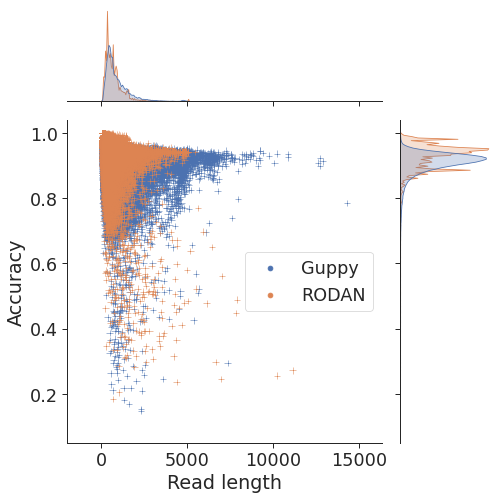

Arabidopsis
(400000,) (400000,) (400000,)


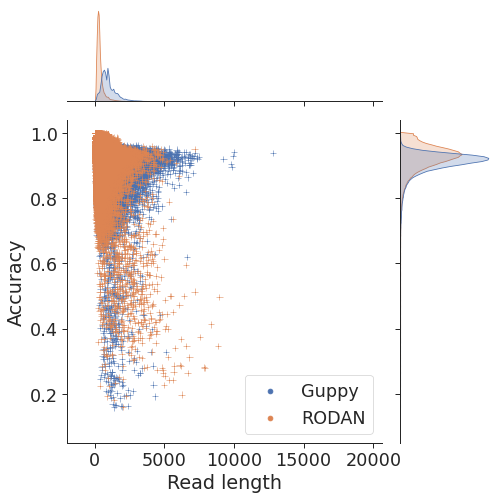

H. volcanii
(36573,) (36573,) (36573,)


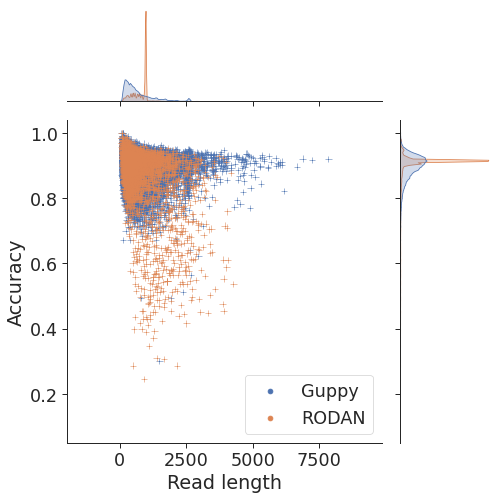

E. coli
(398448,) (398448,) (398448,)


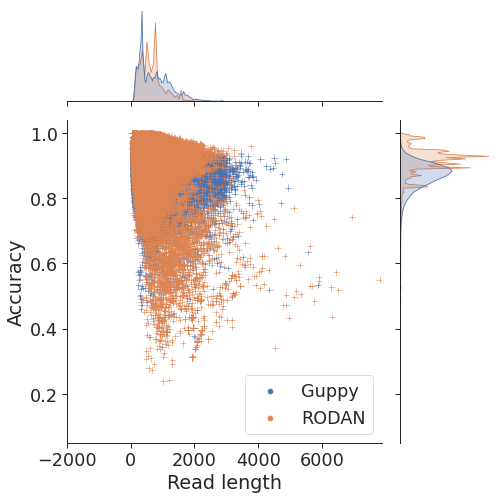

shortRNAs_IVT
(86357,) (86357,) (86357,)


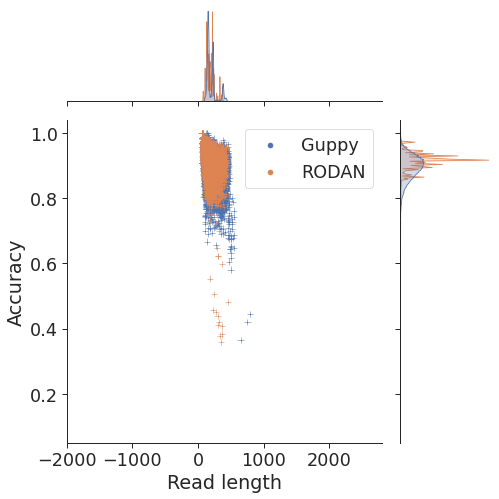

Yeast
(400000,) (400000,) (400000,)


/home/wangl/.conda/envs/fr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


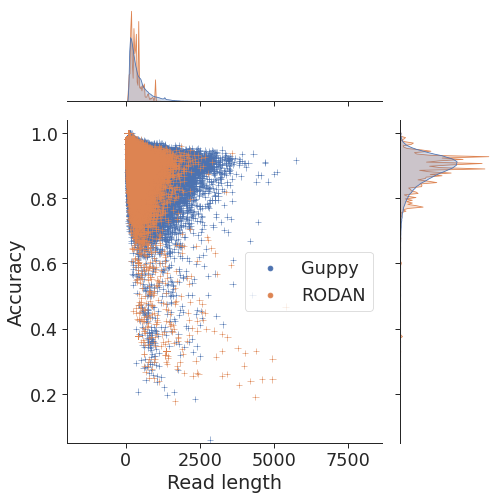

SARS2
(400000,) (400000,) (400000,)


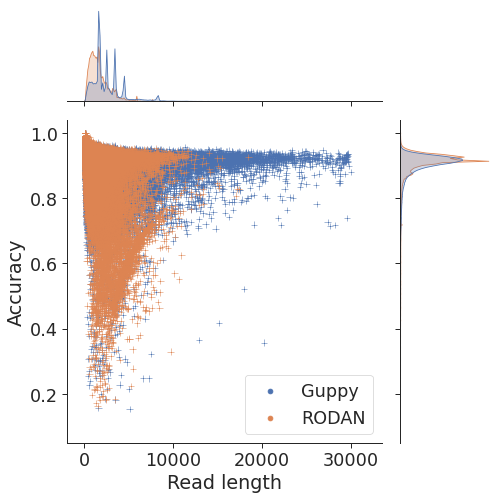

SARS2_IVT
(400000,) (400000,) (400000,)


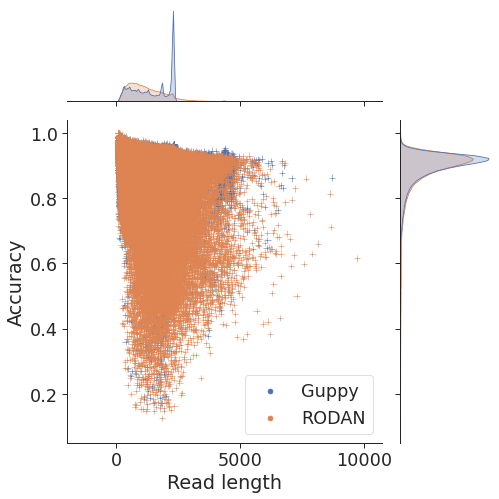

In [16]:
sns.set_context("paper", font_scale = 2)
sns.set_style("ticks")
subsample = 200000
for sample in samples:
    print(sample)
    rodan_sample = sample+"_rodan"
    y1 = (1-np.sum(read_stats[sample]["metrics"], axis = 1))[:subsample] 
    y2 = (1-np.sum(read_stats[rodan_sample]["metrics"], axis = 1))[:subsample]
    x1 = read_stats[sample]["aligned_read_length"][:len(y1)]
    x2 = read_stats[rodan_sample]["aligned_read_length"][:len(y2)]
    hue = np.array(["Guppy"]*len(y1) + ["RODAN"]*len(y2))
    y = np.concatenate([y1, y2])
    x = np.concatenate([x1, x2]).reshape(-1)
    print(x.shape, y.shape, hue.shape)

    sns.jointplot(x = x, y = y, hue = hue, marker = "+", s = 40, marginal_kws=dict(bw_adjust=0.3),
                 ratio = 3, height = 7)
    plt.ylim(0.05,1.04), plt.xlim(-2000, np.max(read_stats[sample]["aligned_read_length"])+2000)
    plt.xlabel("Read length"), plt.ylabel("Accuracy")
    if sample in ["Human", "Zebrafish", "SARS2"]:
        plt.savefig("images/rodan/rodan_len2acc_"+sample, bbox_inches = "tight")
    plt.show()